In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import model_selection
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.model_selection import learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn import (
    ensemble, 
    preprocessing, 
    tree,
    impute,
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv", index_col=0)

In [4]:
df_test = pd.read_csv("test.csv", index_col=0)

In [5]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# Dataset profile

In [6]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
pandas_profiling.ProfileReport(df_test)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Dropping insignificant features

In [8]:
columns=["Name", "Ticket", "Cabin"]

In [9]:
df = df.drop(columns=columns)

In [10]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S

In [11]:
df_test = df_test.drop(columns=columns)

In [12]:
df_test.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                      
892               3    male  34.5      0      0   7.8292        Q
893               3  female  47.0      1      0   7.0000        S
894               2    male  62.0      0      0   9.6875        Q
895               3    male  27.0      0      0   8.6625        S
896               3  female  22.0      1      1  12.2875        S

# Encode categorical features (sex, embarked)

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
PassengerId                                                            
1                   0       3  22.0      1      0   7.2500         1   
2                   1       1  38.0      1      0  71.2833         0   
3                   1       3  26.0      0      0   7.9250         0   
4                   1       1  35.0      1      0  53.1000         0   
5                   0       3  35.0      0      0   8.0500         1   

             Embarked_Q  Embarked_S  
PassengerId                          
1                     0           1  
2                     0           0  
3                     0           1  
4                     0           1  
5                     0           1

In [15]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [16]:
df_test.head()

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
PassengerId                                                              
892               3  34.5      0      0   7.8292         1           1   
893               3  47.0      1      0   7.0000         0           0   
894               2  62.0      0      0   9.6875         1           1   
895               3  27.0      0      0   8.6625         1           0   
896               3  22.0      1      1  12.2875         0           0   

             Embarked_S  
PassengerId              
892                   0  
893                   1  
894                   0  
895                   1  
896                   1

# Defining X and y

In [17]:
y = df.pop('Survived')

In [18]:
X = df

In [19]:
X_test = df_test

In [20]:
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
PassengerId                                                              
1                 3  22.0      1      0   7.2500         1           0   
2                 1  38.0      1      0  71.2833         0           0   
3                 3  26.0      0      0   7.9250         0           0   
4                 1  35.0      1      0  53.1000         0           0   
5                 3  35.0      0      0   8.0500         1           0   

             Embarked_S  
PassengerId              
1                     1  
2                     0  
3                     1  
4                     1  
5                     1

In [21]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

# Filling missing values (Age)

In [22]:
num_cols = ["Age"]

In [23]:
imputer = impute.IterativeImputer()

In [24]:
imputed = imputer.fit_transform(X[num_cols])

In [25]:
X.loc[:, num_cols] = imputed

In [26]:
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
PassengerId                                                              
1                 3  22.0      1      0   7.2500         1           0   
2                 1  38.0      1      0  71.2833         0           0   
3                 3  26.0      0      0   7.9250         0           0   
4                 1  35.0      1      0  53.1000         0           0   
5                 3  35.0      0      0   8.0500         1           0   

             Embarked_S  
PassengerId              
1                     1  
2                     0  
3                     1  
4                     1  
5                     1

In [27]:
imputed = imputer.fit_transform(X_test[num_cols])

In [28]:
X_test.loc[:, num_cols] = imputed

In [29]:
X_test[X_test.loc[:, 'Fare'].isnull()] = X_test[X_test.loc[:, 'Fare'].isnull()].fillna(X_test.loc[:, 'Fare'].mean())

In [30]:
X_test.head()

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
PassengerId                                                              
892               3  34.5      0      0   7.8292         1           1   
893               3  47.0      1      0   7.0000         0           0   
894               2  62.0      0      0   9.6875         1           1   
895               3  27.0      0      0   8.6625         1           0   
896               3  22.0      1      1  12.2875         0           0   

             Embarked_S  
PassengerId              
892                   0  
893                   1  
894                   0  
895                   1  
896                   1

# Log Transform Fare feature

In [31]:
fare_log = np.log(X.loc[:, 'Fare'] + 1)

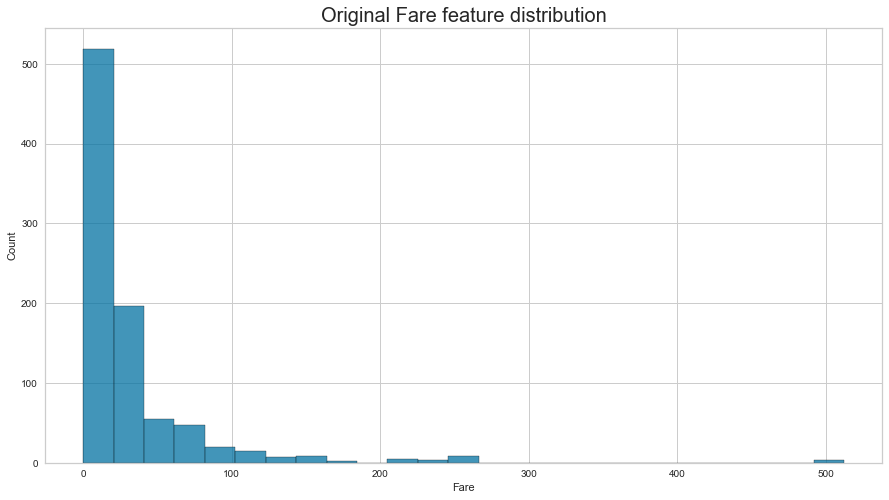

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(x=X.loc[:, 'Fare'], bins=25, ax=ax)
ax.set_title('Original Fare feature distribution', fontsize=20)
plt.show()

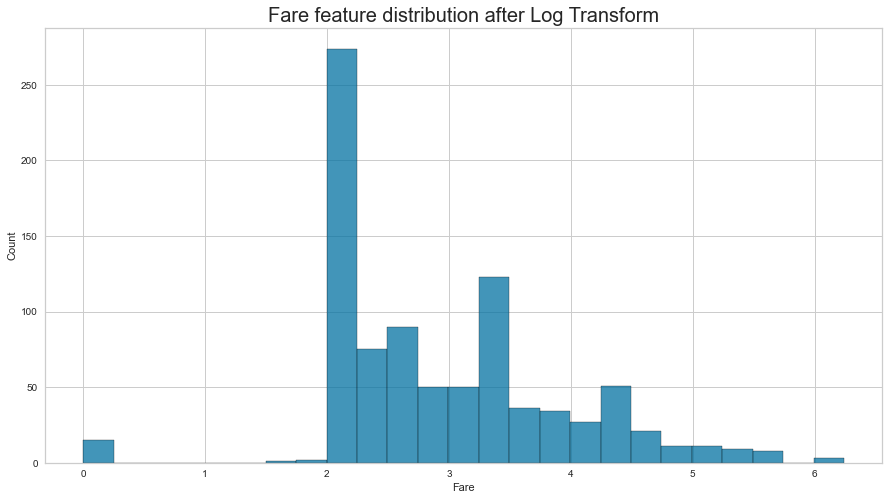

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(x=fare_log, bins=25, ax=ax)
ax.set_title('Fare feature distribution after Log Transform', fontsize=20)
plt.show()

In [34]:
X.loc[:, 'Fare'] = fare_log

In [35]:
X.head()

Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
PassengerId                                                               
1                 3  22.0      1      0  2.110213         1           0   
2                 1  38.0      1      0  4.280593         0           0   
3                 3  26.0      0      0  2.188856         0           0   
4                 1  35.0      1      0  3.990834         0           0   
5                 3  35.0      0      0  2.202765         1           0   

             Embarked_S  
PassengerId              
1                     1  
2                     0  
3                     1  
4                     1  
5                     1

In [36]:
X_test.loc[:, 'Fare'] = np.log(X_test.loc[:, 'Fare'] + 1)

In [37]:
X_test.head()

Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
PassengerId                                                               
892               3  34.5      0      0  2.178064         1           1   
893               3  47.0      1      0  2.079442         0           0   
894               2  62.0      0      0  2.369075         1           1   
895               3  27.0      0      0  2.268252         1           0   
896               3  22.0      1      1  2.586824         0           0   

             Embarked_S  
PassengerId              
892                   0  
893                   1  
894                   0  
895                   1  
896                   1

# Age and Fare features standartization

In [38]:
cols = ["Age", "Fare"]

In [39]:
std_scaler = preprocessing.StandardScaler()

In [40]:
X.loc[:, cols]

Age      Fare
PassengerId                     
1            22.000000  2.110213
2            38.000000  4.280593
3            26.000000  2.188856
4            35.000000  3.990834
5            35.000000  2.202765
...                ...       ...
887          27.000000  2.639057
888          19.000000  3.433987
889          29.699118  3.196630
890          26.000000  3.433987
891          32.000000  2.169054

[891 rows x 2 columns]

In [41]:
std_scaler.fit(X.loc[:, cols])

StandardScaler()

In [42]:
X.loc[:, cols] = std_scaler.transform(X.loc[:, cols])

In [43]:
X.head()

Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
PassengerId                                                                   
1                 3 -0.592481      1      0 -0.879741         1           0   
2                 1  0.638789      1      0  1.361220         0           0   
3                 3 -0.284663      0      0 -0.798540         0           0   
4                 1  0.407926      1      0  1.062038         0           0   
5                 3  0.407926      0      0 -0.784179         1           0   

             Embarked_S  
PassengerId              
1                     1  
2                     0  
3                     1  
4                     1  
5                     1

In [44]:
X_test.loc[:, cols] = std_scaler.transform(X_test.loc[:, cols])

In [45]:
X_test.head()

Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
PassengerId                                                                   
892               3  0.369449      0      0 -0.809683         1           1   
893               3  1.331378      1      0 -0.911513         0           0   
894               2  2.485693      0      0 -0.612461         1           1   
895               3 -0.207709      0      0 -0.716562         1           0   
896               3 -0.592481      1      1 -0.387631         0           0   

             Embarked_S  
PassengerId              
892                   0  
893                   1  
894                   0  
895                   1  
896                   1

# PCA

In [46]:
pca = PCA(n_components=2)

In [47]:
pca.fit(X)

PCA(n_components=2)

In [48]:
X_pca = pca.transform(X)

In [49]:
print("Original X shape: {}".format(str(X.shape))) 
print("X shape after PCA: {}".format(str(X_pca.shape)))

Original X shape: (891, 8)
X shape after PCA: (891, 2)


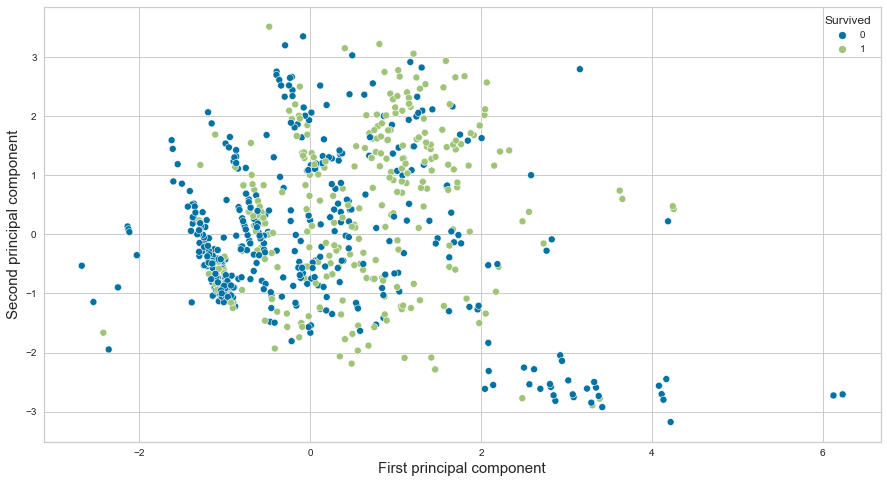

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, ax=ax)
ax.set_xlabel("First principal component", fontsize=15) 
ax.set_ylabel("Second principal component", fontsize=15)
plt.show()

# TSNE

In [51]:
tsne = TSNE(random_state=42)

In [52]:
X_tsne = tsne.fit_transform(X)

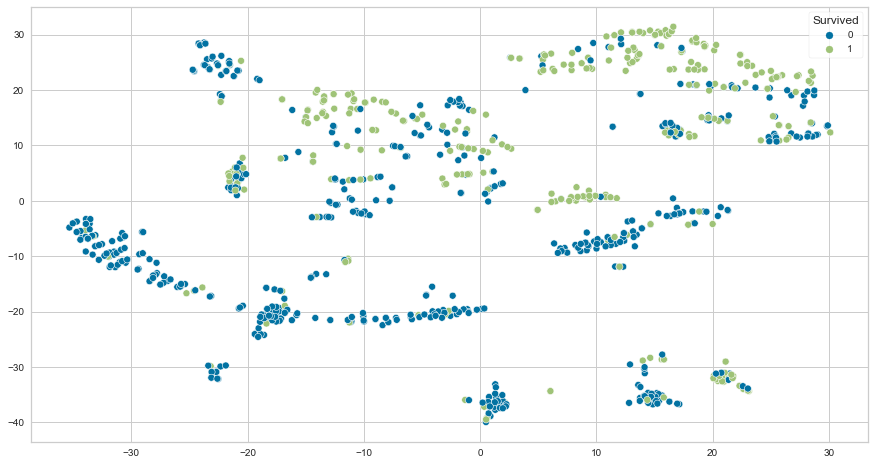

In [53]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, ax=ax)
ax.legend(title='Survived', frameon=True)

# Saving X and y using Pickle

In [54]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [55]:
pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

In [56]:
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()